In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_excel("/Users/luolan/Desktop/statistic_id1008102_garmin-quarterly-revenue-by-segment-2017-2023.xlsx")
df.head()

,Time,Fitness,Outdoor,Aviation
0,1Q '17,137.83,115.88,122.87
1,2Q '17,181.02,194.78,124.06
2,3Q '17,167.15,184.94,124.63
3,4Q '17,276.20,203.28,129.80
4,1Q '18,166.04,144.26,145.71


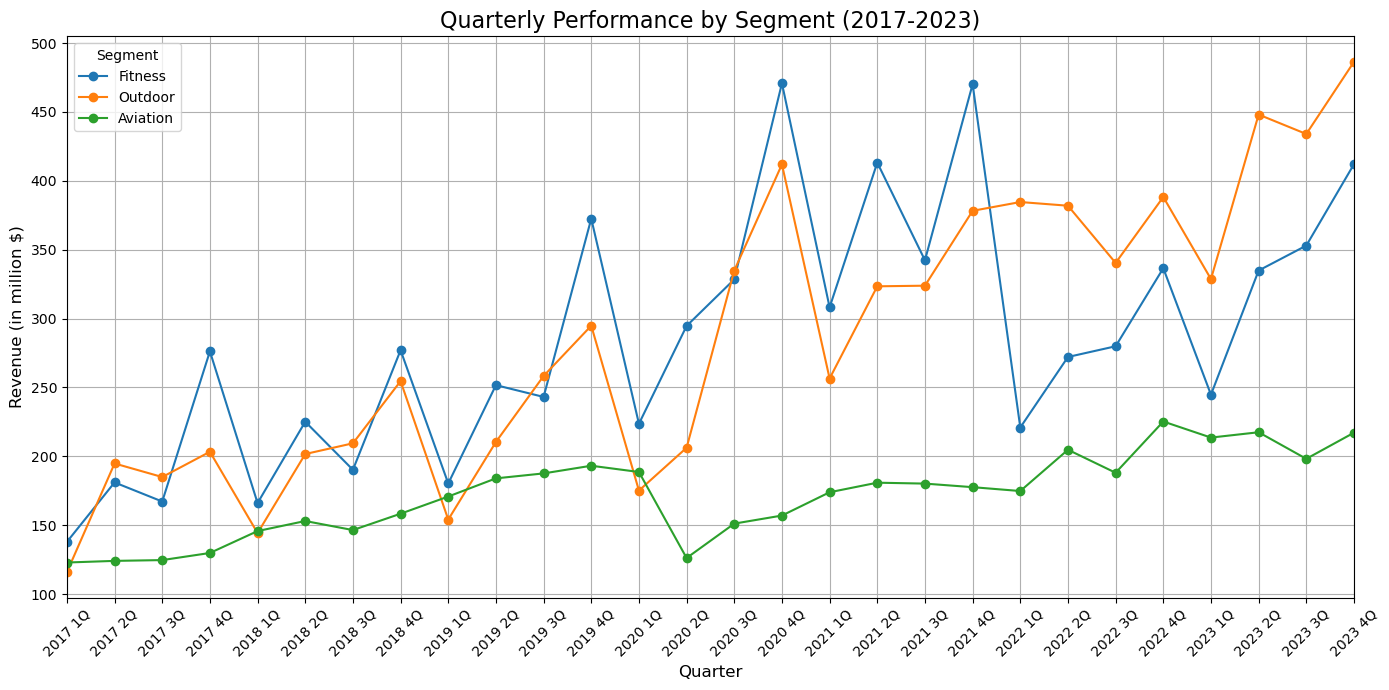

In [2]:
# Correcting the quarter label formatting on the x-axis
import numpy as np

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Define a function to format the x-axis with correct quarter labels
def format_quarter_label(tick_val, pos):
    if tick_val in df.index:
        year_quarter = str(df.at[tick_val, 'Time']).split(" ")
        year = "20" + year_quarter[1].replace("'", "")
        quarter = year_quarter[0]
        return f"{year} {quarter}"
    else:
        return ''

# Plot each segment
for column in df.columns[1:6]:
    ax.plot(df.index, df[column], marker='o', label=column)

# Formatting the plot
ax.set_title('Quarterly Performance by Segment (2017-2023)', fontsize=16)
ax.set_xlabel('Quarter', fontsize=12)
ax.set_ylabel('Revenue (in million $)', fontsize=12)
ax.legend(title='Segment')
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_quarter_label))

# Set the x-ticks to be at the indices of our data, so each tick corresponds with the end of a quarter
ax.set_xticks(np.arange(len(df.index)))

# Ensure that each tick on the x-axis corresponds to a quarter-end in the data
ax.set_xlim([0, len(df.index) - 1])

# Rotate the labels on the x-axis for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability of the plot
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
